# Creating our first Context

## Basics of the basics

In [4]:
import os

import findspark
import pyspark
import time
import operator

In [3]:
from pyspark import SparkConf
from pyspark import SparkContext

conf = SparkConf()
conf.setMaster("local")
conf.setAppName("spark-basic")
sc = SparkContext(conf = conf)#Start the environment/context.

What does this function do?

In [3]:
def surprise(x):
    for i in range(2,x):
        if (x % i) == 0:
            return(x,"No")
    return(x,"Yes")

In [4]:
for i in range(2,10):
        if divmod(10, i) == 0:
            print(i)
    #return(x,"Yes")

In [5]:
surprise(5)

(5, 'Yes')

In [91]:
rdd = sc.parallelize(range(2,10000)).map(surprise).take(20)#create a list of objects that will work in parallel
#transormations and actions. 
#

In [92]:
print(rdd)

[(2, 'Yes'), (3, 'Yes'), (4, 'No'), (5, 'Yes'), (6, 'No'), (7, 'Yes'), (8, 'No'), (9, 'No'), (10, 'No'), (11, 'Yes'), (12, 'No'), (13, 'Yes'), (14, 'No'), (15, 'No'), (16, 'No'), (17, 'Yes'), (18, 'No'), (19, 'Yes'), (20, 'No'), (21, 'No')]


#### Warming up Exercise: Smarter way?

**Option 1**

In [9]:
start_time = time.time()

rdd = sc.parallelize(range(2,int(5e4))).map(surprise).take(int(5e6))#if we dont use take, the 
#pyspart will just work when we trigger an action, in this case .take

print("--- %s seconds ---" % (time.time() - start_time))

--- 5.238167762756348 seconds ---


**Option 2**

In [10]:
def surprise2(x):
    for i in range(2,int((x+2)/2)):
        if (x % i) == 0:
            return(x,"No")
    return(x,"Yes")

In [11]:
rdd = sc.parallelize(range(2,10000)).map(surprise2).take(10)#create a list of objects that will work in parallel
print(rdd)

[(2, 'Yes'), (3, 'Yes'), (4, 'No'), (5, 'Yes'), (6, 'No'), (7, 'Yes'), (8, 'No'), (9, 'No'), (10, 'No'), (11, 'Yes')]


In [12]:
start_time = time.time()

rdd = sc.parallelize(range(2,int(5e4))).map(surprise2).take(int(5e4))

print("--- %s seconds ---" % (time.time() - start_time))

--- 2.7557456493377686 seconds ---


- What happens if we reduce the value of the function take()? A= Nothing, it will be computing everythong regardless what 
- What happens if we don't use the function take() ? A= the time is very small because pyspark is not processing anything, because there is no trigger.(take)

In [38]:
print(rdd)

[(2, 'Yes'), (3, 'Yes'), (4, 'No'), (5, 'Yes'), (6, 'No'), (7, 'Yes'), (8, 'No'), (9, 'No'), (10, 'No'), (11, 'Yes'), (12, 'No'), (13, 'Yes'), (14, 'No'), (15, 'No'), (16, 'No'), (17, 'Yes'), (18, 'No'), (19, 'Yes'), (20, 'No'), (21, 'No'), (22, 'No'), (23, 'Yes'), (24, 'No'), (25, 'No'), (26, 'No'), (27, 'No'), (28, 'No'), (29, 'Yes'), (30, 'No'), (31, 'Yes'), (32, 'No'), (33, 'No'), (34, 'No'), (35, 'No'), (36, 'No'), (37, 'Yes'), (38, 'No'), (39, 'No'), (40, 'No'), (41, 'Yes'), (42, 'No'), (43, 'Yes'), (44, 'No'), (45, 'No'), (46, 'No'), (47, 'Yes'), (48, 'No'), (49, 'No'), (50, 'No'), (51, 'No'), (52, 'No'), (53, 'Yes'), (54, 'No'), (55, 'No'), (56, 'No'), (57, 'No'), (58, 'No'), (59, 'Yes'), (60, 'No'), (61, 'Yes'), (62, 'No'), (63, 'No'), (64, 'No'), (65, 'No'), (66, 'No'), (67, 'Yes'), (68, 'No'), (69, 'No'), (70, 'No'), (71, 'Yes'), (72, 'No'), (73, 'Yes'), (74, 'No'), (75, 'No'), (76, 'No'), (77, 'No'), (78, 'No'), (79, 'Yes'), (80, 'No'), (81, 'No'), (82, 'No'), (83, 'Yes'), 

## A bit more...

### Persistance

- RDDs in python are lazily evaluated, so if we are planning to reuse multiple times the same RDD, we will be recomputing it that many times
- To avoid this, we can force our program to persist the data

Let's see the persisting approach:

In [39]:
rdd = sc.parallelize(range(2,int(1e9)))
rdd.cache() #store (persisting) the object in memory, in order to not compute it everytime. In RAM. 
#rdd.persist() #store also in RAM but different way. 

start_time = time.time()

rdd.map(surprise).take(10000)

print("--- %s seconds ---" % (time.time() - start_time))

--- 7.354532241821289 seconds ---


Against the normal one:

In [40]:
rdd = sc.parallelize(range(2,int(1e9)))

start_time = time.time()

rdd.map(surprise).take(10000)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.4337456226348877 seconds ---


And same happens with the function cache()... What? Why?

### And what about text?

In [93]:
file = open("Quijote.txt","r", encoding='utf-8').read()

In [12]:
rdd = sc.textFile(file)

In [13]:
rdd

PRIMERA PARTE
CAPÍTULO 1: Que trata de la condición y ejercicio del famoso hidalgo D. Quijote de la Mancha
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, seco de carnes, enjuto de rostro; gran madrugador y amigo 

# More theory... again

## Transformations vs Actions

In a nutshell:

**Transformations** create new rdds\
MAP- transforming a list of values to objects

**Actions** give us values

## Transformations

- Are lazy, really lazy!
- Create dependencies, chains of transformations
- Trigger

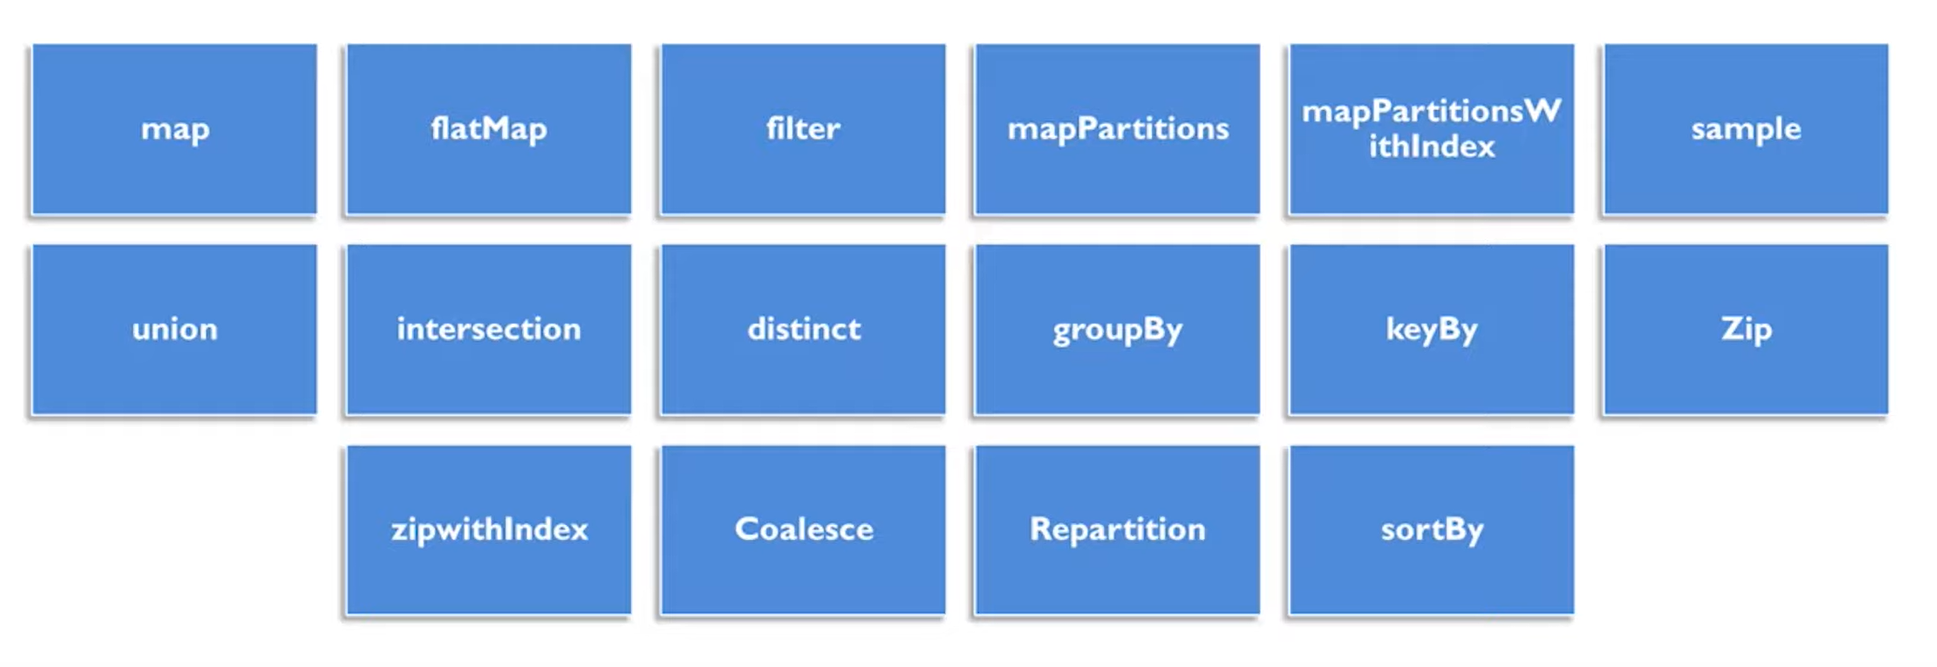

In [41]:
#Transform an object and apply an action. 
#Transformations are lazy, because they need a trigger to act. 
#PySpark apply chain of transformations, ie. when filtering with two filters, first it will apply the more specific and then the more general

#### Map

In [94]:
x = sc.parallelize(["A","B","C","D","D"])
y = x.map(lambda x:(x,1))#Lambda functionds are functinos but very simple
y.collect()
#take can take certaing number, collect brings everything. 

[('A', 1), ('B', 1), ('C', 1), ('D', 1), ('D', 1)]

By the way... collect is not a transformation, but an action!

#### Flatmap

In [14]:
x = sc.parallelize([1,3,4,5])
x.map(lambda x: range(1,x)).collect()
#x.map(lambda x:(1,x)).collect()

[range(1, 1), range(1, 3), range(1, 4), range(1, 5)]

In [16]:
x = sc.parallelize([1,3,4,5])
x.flatMap(lambda x: range(1,x)).collect()
#x.flatMap(lambda x: (1,x)).collect()

[1, 2, 1, 2, 3, 1, 2, 3, 4]

Try to explain what flatmap does. What is the difference with map? Can you explain what is going on here?

A= map creates the object without applying range function. FlatMap flattens the result applying range fuction. 

#### Filter

It returns only the true values, map would bring you all of them but true, false. 

In [20]:
x = sc.parallelize(range(1,20,3))
x.filter(lambda x: x%2 == 0).collect()
#x.map(lambda x: x%2 == 0).collect()

[4, 10, 16]

In [100]:
def email(str):
    words = str.split()
    #print(words)
    res =[]
    for word in words:
        #print(word)
        if '@' in word:   
            res.append(word)
            return True
        else:
            return False;

In [104]:
def findemail(x):
    if x.endswith(".com") and "@" in x:
        return True
    else: 
        return False

In [101]:
email('My email is roberto.arenal@')

False

Define a function that, given a list of strings, is able to keep only e-mail adresses.

In [105]:
### Your code here
x = sc.parallelize('My email is roberto.arenal@')#this object that is stored in memory, will be parallelize when an action is called. 
#x.map(email).collect()
x.filter(findemail).collect()
#x.filter(lambda x:True if email(x) else False).collect()

[]

In [96]:
list = ['some@yahoo.com','someone', 'facebook.com' , 'k@gmail.com' , 'tap@' , '.com']
x = sc.parallelize(list)
x.filter(lambda x: '@' in x and x.endswith('.com')).collect()


['some@yahoo.com', 'k@gmail.com']

In [ ]:
#Apply a condition to elements and i will keep the ones that complies the condition.  

#### Sample

Search how to use the transformation sample(), which parameters are needed?

Code a function that, using pyspark, returns the sum of k dices of m sides. So dice(k = 3, m = 6) would return values between 3 and 18.

In [18]:
### Your code here

def dice(k, m = 6):
    suma = 0
    for i in range(k):
        suma += sc.parallelize(range(1,m+1)).sample(fraction = 1, withReplacement = True).collect()[0]
    return suma

dice(3)

Code a function that generates lottery numbers between 00000 and 99999.

##### Union and intersection

Union = merge both lists including those that they dont share.

Intersection = joins both lists just the shared values. 

In [99]:
x = sc.parallelize(range(0,10))
y = sc.parallelize(range(6,12))
print(x.union(y).collect())
print(x.intersection(y).collect())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11]
[6, 8, 7, 9]


Are they symmetric?
Think about a real world application (on social media, for example....) of these two transformations
A= Non symetric 

Code a function that depends of 2 lists, and returns the values that are unique in the first list (www.google.com)

In [20]:
#### Your code here


##### Distinct

Explore the transformation distinct, and find a meaningful example where it can be useful

In [115]:
#### Your code here
sc.parallelize([1,3,4,5,4,3,2]).distinct().collect()

[1, 3, 4, 5, 2]

#### Sortby

In [100]:
sc.parallelize([1,3,4,6,2,3,4,5,1]).sortBy(lambda x: x, True).collect()

[1, 1, 2, 3, 3, 4, 4, 5, 6]

In [101]:
sc.parallelize([("A",1),("B",2),("C",3),("D",4),("D",5)]).sortBy(lambda x: x, False ).collect()
sc.parallelize([("A",1),("B",2),("C",3),("D",4),("D",5)]).sortBy(lambda x: x[1], False ).collect()

[('D', 5), ('D', 4), ('C', 3), ('B', 2), ('A', 1)]

Wait wait... what is it really doing here? Explore a bit!

#### MapPartitions

In [102]:
x = sc.parallelize([1,2,3,4,5],2)#We divide the information in 2 chunks
def func(x): yield sum(x)

x.mapPartitions(func).collect()

[3, 12]

To master yield, you must understand that when you call the function, the code you have written in the function body does not run. The function only returns the generator object, this is a bit tricky.
Yield dont sum and return the sum, it iterates over each value and then sum. 

In [103]:
def create_generator():
    mylist = range(3)
    for i in mylist:
        yield i*i

In [126]:
mygenerator = create_generator()
for i in mygenerator:
    print(i)

0
1
4


What is going on? What are these numbers? Experiment a bit!

Once you have it clear, check the differences between mapPartitions and map PartitionsWithIndex

#### Groupby

In [129]:
x = sc.parallelize([1,1,2,3,4,5,6,8,9,10])
groups = x.groupBy(lambda x: x % 3).collect()
sorted([(x,sorted(y))] for (x,y) in groups)

[[(0, [3, 6, 9])], [(1, [1, 1, 4, 10])], [(2, [2, 5, 8])]]

Create a function that, given a list of different texts, detects how many times a word(s), appears on it. 

For example, to detect if an article is talking about FCB, check if the words "Messi", "Setien" or "Barça" appear.

In [26]:
#### Your code here

#### Zip

In [104]:
sc.parallelize(range(0,5)).zip(sc.parallelize(range(20,25))).collect()
#Matching the values from one list and another. 

[(0, 20), (1, 21), (2, 22), (3, 23), (4, 24)]

Does it have any restrictions? What happens if we give different lengths? What would R do?

#### Repartition and coalesce

In [28]:
x = sc.parallelize(range(0,20),6)
x.glom().collect()

[[0, 1, 2],
 [3, 4, 5],
 [6, 7, 8, 9],
 [10, 11, 12],
 [13, 14, 15],
 [16, 17, 18, 19]]

In [105]:
print(x.repartition(2).glom().collect())

print(x.coalesce(2).glom().collect())


[[1, 2], [3, 4, 5]]
[[1, 2], [3, 4, 5]]


What is the criteria? Experiment a little

#### Reduce

In [106]:
from operator import add

sc.parallelize(range(0,100)).reduce(add)

4950

In [112]:
x=sc.parallelize(range(0,10))
x.reduce(add)

45

Why add and not sum?

## Actions

- They produce values back to the Spark program
- They make transformations start moving!

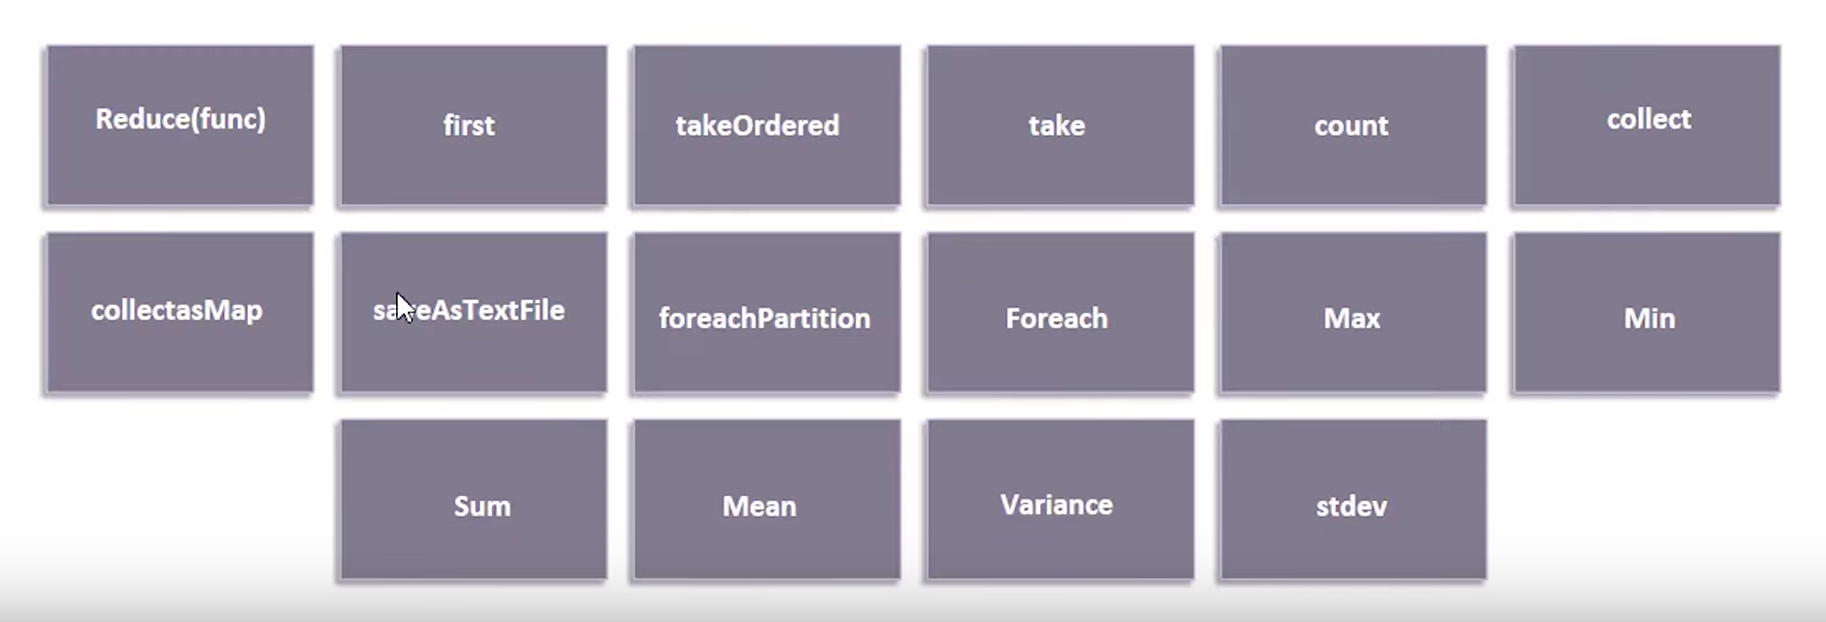

#### Reduce

In [13]:
from operator import add

sc.parallelize(range(0,100)).reduce(add)

4950

Why add and not sum?

Hint:

In [14]:
def prod(a,b):
    return(a*b)

sc.parallelize(range(1,10)).reduce(prod)

362880

#### First and TakeOrdered

In [24]:
x = sc.parallelize([11,1,3,5,4,2,7,8,1,6,5,11])

print(x.first())

print(x.takeOrdered(6))

11
[1, 1, 2, 3, 4, 5]


How would you select the last 3? And the last 3 without repetitions?

In [25]:
x.takeOrdered(6, key=lambda x: -x)

[11, 11, 8, 7, 6, 5]

In [26]:
x.distinct().takeOrdered(6, key=lambda x: -x)

[11, 8, 7, 6, 5, 4]

#### Max, min, sum, mean, variance, stdev, count....

Create a function that computes the coefficient of variation of a numeric list. If you don't know what it is... what better time than now to learn it?!

Create a function that converts a numeric list into a percentage list

In [27]:
#### Your code here
x1= x.stdev()
x2 = x.mean()
x3 = x1/x2
print(x3)

0.618718433538229


In [28]:
from operator import add
x1 = x.reduce(add)
x2 = x.map(lambda x:(x/x1))
x2.collect()

[0.171875,
 0.015625,
 0.046875,
 0.078125,
 0.0625,
 0.03125,
 0.109375,
 0.125,
 0.015625,
 0.09375,
 0.078125,
 0.171875]

#### Countbyvalue

In [29]:
sc.parallelize([1,2,5,4,6,8,7,2,3,4,3,1,6,7,3,2,1]).countByValue()

defaultdict(int, {1: 3, 2: 3, 5: 1, 4: 2, 6: 2, 8: 1, 7: 2, 3: 3})

## Some functions and more transformations (with paired RDDs)

#### Reducebykey and groupByKey

In [36]:
from operator import add
x = sc.parallelize({(1,2),(2,1),(1,3),(3,3),(4,1)})
print(x.reduceByKey(add).collect())
x.groupByKey().collect()

[(1, 5), (2, 1), (4, 1), (3, 3)]


[(1, <pyspark.resultiterable.ResultIterable at 0x7f11159a47f0>),
 (2, <pyspark.resultiterable.ResultIterable at 0x7f11159a4d90>),
 (4, <pyspark.resultiterable.ResultIterable at 0x7f11159a4eb0>),
 (3, <pyspark.resultiterable.ResultIterable at 0x7f11159a4880>)]

In [41]:
x.groupByKey().mapValues(list).collect()

[(1, [2, 3]), (2, [1]), (4, [1]), (3, [3])]

In [59]:
x.keys().collect()
x.values().collect()
#x.mapValues(lambda x: x).collect()
x.groupByKey().mapValues(lambda x:len(x)).collect()

[(1, 2), (2, 1), (4, 1), (3, 1)]

Describe and code a real world application with these functions. Try to incorporate other actions/transformations to make it more meaningful

In [11]:
#### Your code here


[(1, [2, 3]), (2, [1]), (4, [1]), (3, [3])]

#### mapValues and flatMapValues

Explore how these two transformations work, and find a working example for them

In [44]:
#### Your code here
x = sc.parallelize([("a", ["apple", "banana", "lemon"]), ("b", ["grapes"])])
x.mapValues(lambda f : len(f)).collect()

[('a', 3), ('b', 1)]

In [18]:
x = sc.parallelize([("a", ["apple", "banana", "lemon"]), ("b", ["grapes"])])
x.flatMapValues(lambda x: x).collect()

[('a', 'apple'), ('a', 'banana'), ('a', 'lemon'), ('b', 'grapes')]

#### Keys, sortByKey and substractByKey

In [49]:
x = sc.parallelize({(1,2),(2,1),(1,3),(3,3),(4,1)})
x.keys().collect()

[1, 2, 4, 3, 1]

In [46]:
x.sortByKey().collect()

[(1, 2), (1, 3), (2, 1), (3, 3), (4, 1)]

In [41]:
y = sc.parallelize({(1,6),(5,3)})
x.subtractByKey(y).collect()

[(2, 1), (4, 1), (3, 3)]

#### Joins!!!

Explore the transformations .join(), .rightOuterJoin(), .leftOuterJoin() and .cogroup()

Work with the following data:

In [42]:
x = sc.parallelize({("A",2),("B",1),("A",3),("C",3),("D",1)})
y = sc.parallelize({("D",1),("A",7),("B",3),("A",9),("E",3),("F",4)})

In [43]:
#### Your code here

### Exercise

Code a word count program that gives you the top 100 words of "El Quijote". The order you perform the operations is really important here!

In [44]:
#### Your code here

List of hints:
- First try to split the words before transforming them into a rdd
- You need to assign each of the words a value 1, we have seen how to do it
- After that, you will need to use the word (the key) to sum the 1s
- Almost done, but we would like to see the top... is the dictionary in the right order?

#### One possible solution... don't look!
Explain line by line what is going on!

In [ ]:
from pyspark import SparkConf
from pyspark import SparkContext

conf = SparkConf()
conf.setMaster("local")
conf.setAppName("spark-basic")
sc = SparkContext(conf = conf)#Start the environment/context.

In [5]:
import re
from operator import add
file = open("Quijote.txt","r", encoding='utf-8').read()
words = file.split(" ")
words = sc.parallelize(words)
# words = words.map(lambda x: re.sub(r'[^\w\s]','',x)) # Try it with and without this line
wordcount = words.map(lambda x: (x,1)) 
#wordcount = wordcount.reduceByKey(add) # Alternatively wordcount.reduceByKey(lambda x,y: x+y)
wordcount=wordcount.reduceByKey(lambda x,y: x+y)
wordcount = wordcount.map(lambda x: (x[1],x[0]))
wordcount.sortByKey(False).take(50)

[(10310, 'que'),
 (8926, 'de'),
 (8012, 'y'),
 (4930, 'la'),
 (4716, 'a'),
 (3867, 'en'),
 (3713, 'el'),
 (2776, 'no'),
 (2380, 'se'),
 (2116, 'los'),
 (2015, 'con'),
 (1874, 'por'),
 (1853, 'su'),
 (1799, 'le'),
 (1773, 'lo'),
 (1470, 'las'),
 (1152, 'me'),
 (1129, 'como'),
 (1109, 'del'),
 (957, 'es'),
 (895, 'si'),
 (889, 'un'),
 (878, 'más'),
 (851, 'mi'),
 (812, 'yo'),
 (797, 'al'),
 (749, 'tan'),
 (713, 'don'),
 (693, 'para'),
 (685, 'porque'),
 (649, 'había'),
 (625, 'él'),
 (613, 'sin'),
 (611, 'ni'),
 (594, 'una'),
 (511, 'o'),
 (508, 'todo'),
 (486, 'sus'),
 (466, 'ser'),
 (459, 'ha'),
 (450, 'era'),
 (450, 'bien'),
 (445, 'vuestra'),
 (376, 'ya'),
 (372, 'todos'),
 (350, 'cuando'),
 (346, 'dijo'),
 (343, 'fue'),
 (342, 'donde'),
 (339, 'te')]

In [7]:
file = open("Quijote.txt","r", encoding='utf-8').read()
words = file.split(" ")
words = sc.parallelize(words)

In [8]:
words.map(lambda x: (x,1)).reduceByKey(add).sortByKey(False).take(50)

[('\ufeffDON', 1),
 ('“éste', 1),
 ('‘‘¡Ah,', 1),
 ('–respondió', 53),
 ('–replicó', 13),
 ('–que', 1),
 ('–prosiguió', 1),
 ('–preguntó', 6),
 ('–dirán–', 1),
 ('–dijo,', 1),
 ('–dijo', 61),
 ('–después', 1),
 ('–como', 1),
 ('–añadió', 1),
 ('únicos', 1),
 ('único,', 1),
 ('único', 5),
 ('única,', 1),
 ('única', 2),
 ('último:', 2),
 ('último', 10),
 ('últimas', 1),
 ('últimamente', 3),
 ('última', 4),
 ('órdenes.', 1),
 ('órdenes', 6),
 ('órden', 2),
 ('óiganme', 1),
 ('ñudos,', 1),
 ('íos', 1),
 ('íntimo', 1),
 ('ínterin', 1),
 ('ínsulos', 1),
 ('ínsulas,', 4),
 ('ínsulas', 6),
 ('ínsula.\nLevántose', 1),
 ('ínsula.\nDe', 1),
 ('ínsula,', 9),
 ('ínsula', 10),
 ('ínfima', 1),
 ('ínclitas', 1),
 ('ímpetus.', 1),
 ('ímpetu,', 1),
 ('ímpetu', 1),
 ('ídolo', 1),
 ('íbase', 1),
 ('íbamos,', 1),
 ('íbamos', 2),
 ('éstos:\n¿Quién', 1),
 ('éstos:', 1)]

In [ ]:
from operator import add
rdd=sc.textFile('en-vivo.txt')
rdd=rdd.flatMap(lambda x: x.split(" "))
rdd=rdd.filter(lambda x:x!='')
rdd=rdd.map(lambda x:(x,1)).reduceByKey(add)
rdd=rdd.map(lambda x:(x[1],x[0])).sortByKey(False)
rdd.collect()

### Another Exercise!

Let's code a shopping list!
We will have a list of elements like this:
    
x = sc.parallelize([["Apple",3,0.2],["Pear",5,0.35],["Milk",2,1.1],["Apple",3,0.2]])

Where the first element of each list is the product, the second the number of unit we bought and the third the unit price.

We want to have the list of how much we have spent in each product (ordered), and the total amount of money we have spent. 

(Optional) If we buy more than 10 products of the same type, we have a 10% discount of the final price

In [3]:
items = sc.parallelize([["Apple",3,0.2],["Pear",5,0.35],["Milk",2,1.1],["Apple",3,0.2]])

In [5]:
from operator import add
prod = items.map(lambda x: (x,1))
prod = prod.reduceByKey(add)
prod.sortByKey(False).take(10)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (72ca9dfda99f executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 604, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 594, in process
    out_iter = func(split_index, iterator)
  File "/usr/local/spark/python/pyspark/rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/spark/python/pyspark/rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/spark/python/pyspark/rdd.py", line 418, in func
    return f(iterator)
  File "/usr/local/spark/python/pyspark/rdd.py", line 2144, in combineLocally
    merger.mergeValues(iterator)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 242, in mergeValues
    d[k] = comb(d[k], v) if k in d else creator(v)
TypeError: unhashable type: 'list'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:517)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:652)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:635)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:470)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:834)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2253)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2202)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2201)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2201)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1078)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2440)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2382)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2371)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2202)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2223)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2242)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 604, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 594, in process
    out_iter = func(split_index, iterator)
  File "/usr/local/spark/python/pyspark/rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/spark/python/pyspark/rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/usr/local/spark/python/pyspark/rdd.py", line 418, in func
    return f(iterator)
  File "/usr/local/spark/python/pyspark/rdd.py", line 2144, in combineLocally
    merger.mergeValues(iterator)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 242, in mergeValues
    d[k] = comb(d[k], v) if k in d else creator(v)
TypeError: unhashable type: 'list'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:517)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:652)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:635)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:470)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [65]:
x = sc.parallelize([["Apple",3,0.2],["Pear",5,0.35],["Milk",2,1.1],["Apple",3,0.2]])
x.collect()

[['Apple', 3, 0.2], ['Pear', 5, 0.35], ['Milk', 2, 1.1], ['Apple', 3, 0.2]]

In [66]:
a = x.map(lambda x:(x[0], x[1]*x[2])).reduceByKey(add)
a.collect()
#print(a)

[('Apple', 1.2000000000000002), ('Pear', 1.75), ('Milk', 2.2)]

In [67]:
#g = f.reduceByKeyLocally(add)
g = f.reduceByKeyLocally(add).items()
#type(g)
g

NameError: name 'f' is not defined

### Last one...

Replicate the last exercise, but the structure of the data is different. We have one object with products and prices. On the other hand, we have one list of the following form:

x = sc.parallelize([["Maria","Apple",1],["Maria","Pear",2],["Pau","Milk",4],["Laura","Apple",3]])

We want to know how much each of the have spent in total.

In [47]:
#### Your code here